DWI bvalues: ['0', '50', '350', '600', '900', '1150', '100', '400', '650', '950', '150', '450', '700', '1000', '1300', '200', '500', '800', '1050', '1350', '300', '850', '1100', '1400']


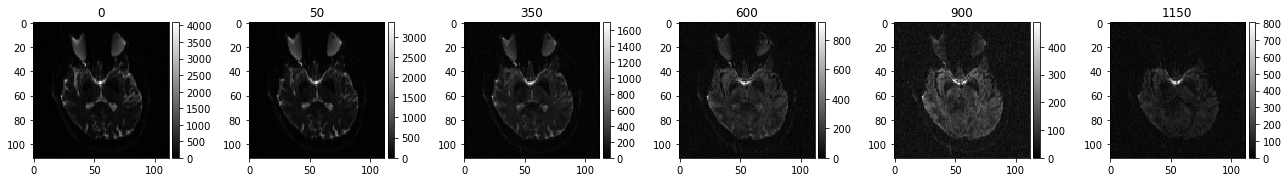

In [8]:
import os
import numpy as np 
import matplotlib.pyplot as plt
import nibabel as nib
from mpl_toolkits.axes_grid1 import make_axes_locatable
from utils import split_name_with_nii, get_slice, get_nifti_data, get_nifti_header_info, summarize_intensities

# PATH_DWI = './test_dataset/dwi/sub-X_ses-Y_run-01_dwi.nii.gz'
# PATH_DWI_MASK = './test_dataset/dwi/sub-X_ses-Y_run-01_dwi_mask.nii.gz'
PATH_DWI = './test_dataset/dwi/sub-X_ses-Y_run-02_dwi.nii.gz'
PATH_DWI_MASK = './test_dataset/dwi/sub-X_ses-Y_run-02_dwi_mask.nii.gz'

img_dwi = nib.load(PATH_DWI)
data_dwi = get_nifti_data(img_dwi)

img_mask = nib.load(PATH_DWI_MASK)
data_mask = get_nifti_data(img_mask)

with open(PATH_DWI.replace('.nii.gz', '.bval')) as f:
    bvals = f.readlines()[0].split()
print('DWI bvalues:', bvals)

fig, axs = plt.subplots(1, 6, figsize=(18, 6))
ax_slice_dwi_b100 = get_slice(data_dwi[..., 0], 'axial')
for i in range(6):
    ax_slice = get_slice(data_dwi[..., i], 'axial')
    im = axs[i].imshow(ax_slice, cmap='gray')
    axs[i].set_title(str(bvals[i]))
    divider = make_axes_locatable(axs[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
fig.tight_layout()
plt.show()

bvals: 0 snr: 3.620838655635793
bvals: 50 snr: 3.2451005410836986
bvals: 350 snr: 2.1688790677440037
bvals: 600 snr: 1.7009299417451937
bvals: 900 snr: 1.628156386727884
bvals: 1150 snr: 1.5284014568211794


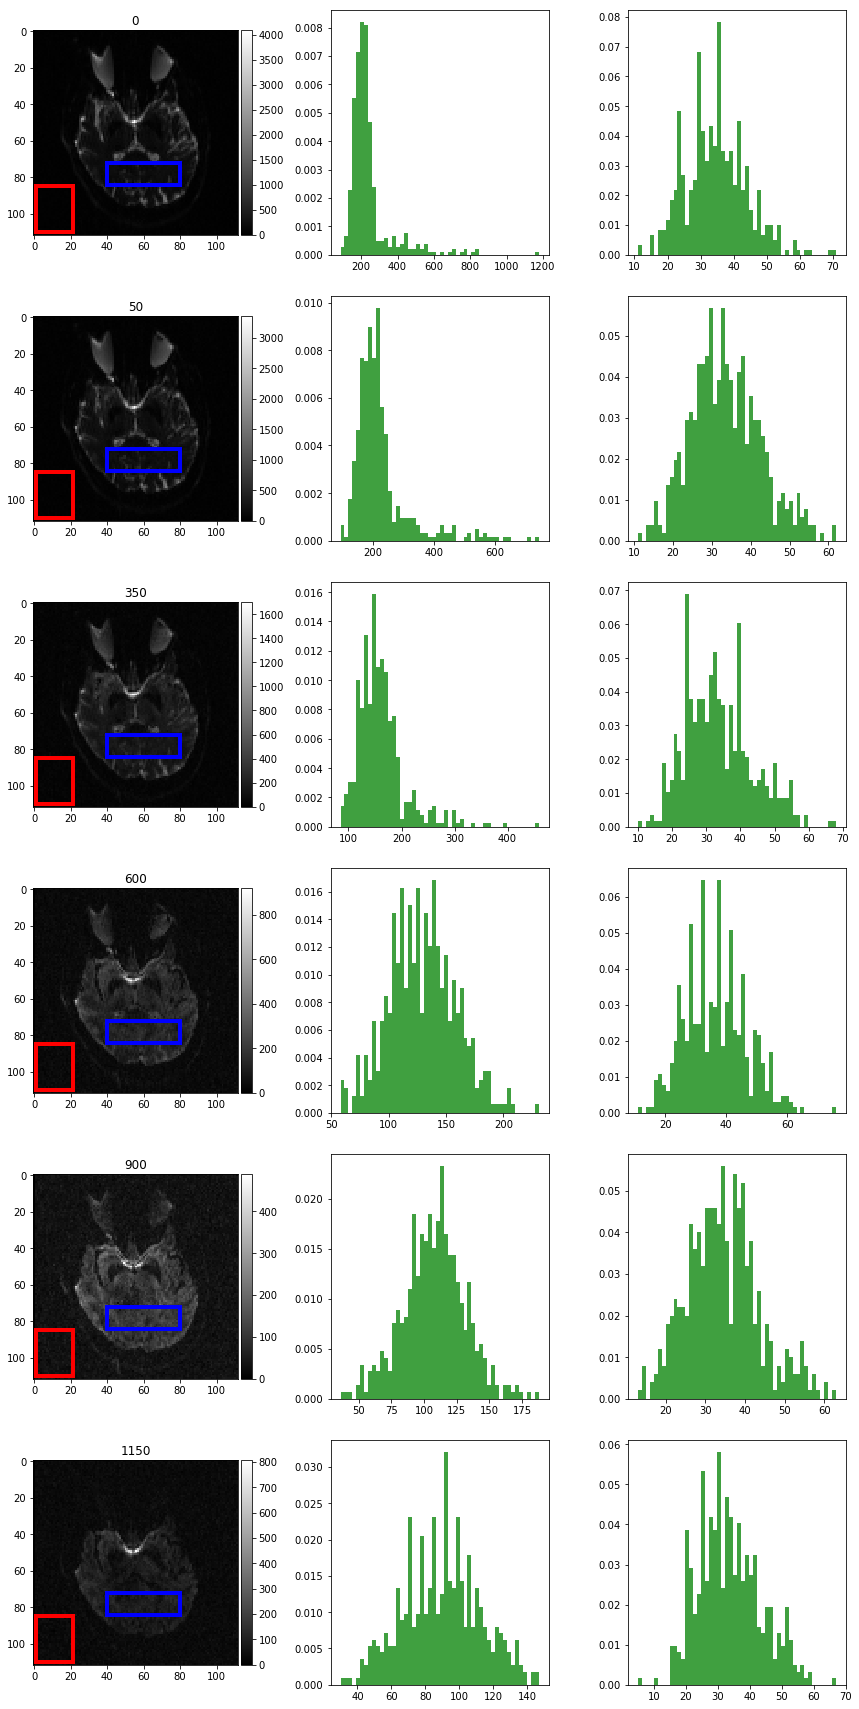

In [40]:
from matplotlib.patches import Rectangle

def compute_snr_v1(data, corner_s, size_s, corner_n, size_n):
    patch_s = data[corner_s[1]:corner_s[1]+size_s[1], corner_s[0]:corner_s[0]+size_s[0]]
    patch_n = data[corner_n[1]:corner_n[1]+size_n[1], corner_n[0]:corner_n[0]+size_n[0]]
    
    std_s = np.std(patch_s)
    std_n = np.std(patch_n)

    return np.sqrt(std_s/std_n), patch_s, patch_n

CORNER_S = (40, 72)
SIZE_S = (40, 12)
CORNER_N = (1, 85)
SIZE_N = (20, 25)

fig, axs = plt.subplots(6, 3, figsize=(12, 24))
for i in range(6):
    ax_slice = get_slice(data_dwi[..., i], 'axial')
    im = axs[i, 0].imshow(ax_slice, cmap='gray')
    axs[i, 0].set_title(str(bvals[i]))
    divider = make_axes_locatable(axs[i, 0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    snr, patch_s, patch_n = compute_snr_v1(ax_slice, CORNER_S, SIZE_S,
                                         CORNER_N, SIZE_N)
    n, bins, patches = axs[i, 1].hist(patch_s.ravel(), 50, density=True, facecolor='g', alpha=0.75)
    axs[i, 0].add_patch(Rectangle(CORNER_S, SIZE_S[0], SIZE_S[1],
                              edgecolor='blue',
                              facecolor='none',
                              lw=4))
    n, bins, patches = axs[i, 2].hist(patch_n.ravel(), 50, density=True, facecolor='g', alpha=0.75)
    axs[i, 0].add_patch(Rectangle(CORNER_N, SIZE_N[0], SIZE_N[1],
                                  edgecolor='red',
                                  facecolor='none',
                                  lw=4))
#     iio.imwrite('n_{}.png'.format(bvals[i]), patch_n)
#     iio.imwrite('s_{}.png'.format(bvals[i]), patch_s)
    print('bvals:', bvals[i], 'snr:', snr)
fig.tight_layout()
plt.show()